Original label :  [3]  --> cat
Predicted label:  [3]  --> cat
Detected image as cat with an accuraccy of 78%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


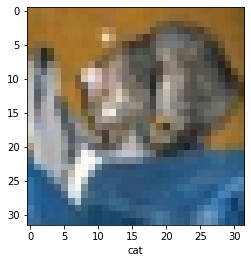

Original label :  [8]  --> ship
Predicted label:  [8]  --> ship
Detected image as ship with an accuraccy of 100%


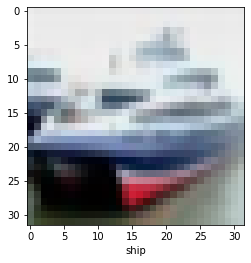

Original label :  [8]  --> ship
Predicted label:  [8]  --> ship
Detected image as ship with an accuraccy of 99%


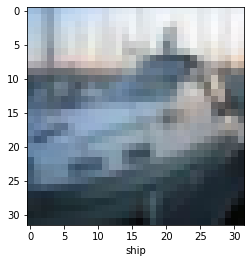

Original label :  [0]  --> airplane
Predicted label:  [0]  --> airplane
Detected image as airplane with an accuraccy of 97%


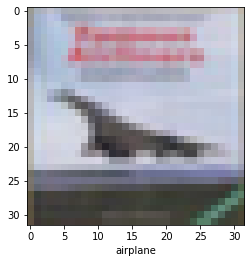

In [14]:
#Simple CNN model for CIFAR-10
import numpy as np
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.models import load_model
import matplotlib.pyplot as plt

# load data
data = load_model('model.h5')
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
#labels in the data
labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

#passing the model
prediction = data.predict(X_test)
#predect the images
def pred_image(i, prediction_arr, original_label, image):
    prediction_arr, original_label, image = prediction_arr, original_label[i], image[i]
    predicted_label = np.argmax(prediction_arr)
    plt.xlabel(labels[int(original_label)])
    print('Original label : ', y_test[i], ' -->', labels[int(original_label)] )
    print('Predicted label: ' , data.predict_classes(image.reshape(1, 32, 32, 3)), ' -->', f"{labels[int(predicted_label)]}")
    print('Detected image as' , labels[int(original_label)], 'with an accuraccy of' , f"{100*np.max(prediction_arr):2.0f}%")
    plt.imshow(image)
    plt.show()
    
#predict the first four images labels
def predict(x):
    for i in range(x):
        pred_image(i,prediction[i], y_test, X_test)
        i = i + 1
predict(4)